In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

def tsne(X, initial_dims=50, max_iter=2000, perplexity=30.0):
    pca = PCA(n_components=initial_dims)
    X_reduced = pca.fit_transform(X)
    tsne = TSNE(n_components=2, verbose=True, perplexity=perplexity, n_iter=max_iter)
    Y = tsne.fit_transform(X_reduced)
    return Y

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.008s...
[t-SNE] Computed neighbors for 5000 samples in 1.424s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.143437
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.838814
[t-SNE] Error after 300 iterations: 2.201843


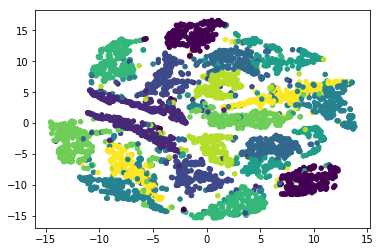

In [3]:
X = np.loadtxt("data/mnist2500_X_shift.txt")
labels = np.loadtxt("data/mnist2500_labels_shift.txt")
Y = tsne(X, 50, 300, 20.0)
plt.scatter(Y[:, 0], Y[:, 1], 20, labels)
plt.show()

In [12]:
# import sys
from sklearn.neighbors import NearestNeighbors as knn
# from sklearn.decomposition import TruncatedSVD
# import numpy as np

nbrs_input = knn(n_neighbors=50).fit(X)
_, indices_input = nbrs_input.kneighbors(X)

In [25]:
nbrs_output = knn(n_neighbors=10).fit(Y)
_, indices_output = nbrs_output.kneighbors(Y)

In [31]:
total_TP = 0

for i in range(X.shape[0]):
    N_TP = np.intersect1d(indices_input[i], indices_output[i]).shape[0]
    total_TP += N_TP

avg_TP = total_TP / X.shape[0]

print(avg_TP)
print('with output neighborhood size 10, recall=%3.3f, precision=%3.3f' % (avg_TP / 50, avg_TP / 10))

7.9088
with output neighborhood size 10, recall=0.158, precision=0.791


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.008s...
[t-SNE] Computed neighbors for 5000 samples in 1.417s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.143387
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.740265
[t-SNE] Error after 3000 iterations: 1.158585


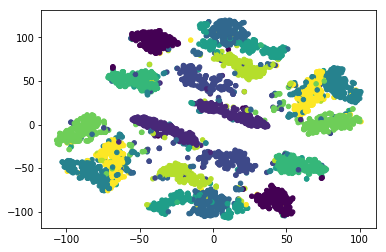

In [2]:
# X = np.loadtxt("data/mnist2500_X.txt")
# labels = np.loadtxt("data/mnist2500_labels.txt")
X = np.loadtxt("data/mnist2500_X_shift.txt")
labels = np.loadtxt("data/mnist2500_labels_shift.txt")
Y = tsne(X, 50, 3000, 20.0)
plt.scatter(Y[:, 0], Y[:, 1], 20, labels)
plt.show()